 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [243]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import os
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [60]:
os.getcwd()

'/Users/samkohnle/Desktop/Assignment3/whaleoftheport'

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [61]:
# Reading whale returns
whale_returns_csv = Path("./whale_returns.csv")
whale_pd = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [62]:
# Count nulls
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [63]:
# Drop nulls
whale_pd.dropna(inplace=True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [64]:
os.getcwd()

'/Users/samkohnle/Desktop/Assignment3/whaleoftheport'

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [65]:
# Reading algorithmic returns
algorithmic_returns_csv=Path("./algo_returns.csv")
algo_pd = pd.read_csv(algorithmic_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [66]:
# Count nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [67]:
# Drop nulls
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [78]:
# Reading S&P 500 Closing Prices
sp500_pricing=Path("./sp500_history.csv")
sp500_df = pd.read_csv(sp500_pricing, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [75]:
# Check Data Types
sp500_df.info()
sp500_df.sort_index(inplace=True)
sp500_df.dtypes
sp500_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [81]:
# Fix Data Types
sp500_df['Close']=sp500_df['Close'].replace(r'[$,]','',regex=True).astype('float64')
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [82]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [83]:
# Drop nulls
sp500_returns.isnull().sum()
sp500_returns.dropna(inplace=True)

In [84]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns=['S&P 500']
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [86]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
comb_portfolio_return = pd.concat([whale_pd, algo_pd, sp500_returns], axis='columns', join= "inner")
comb_portfolio_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

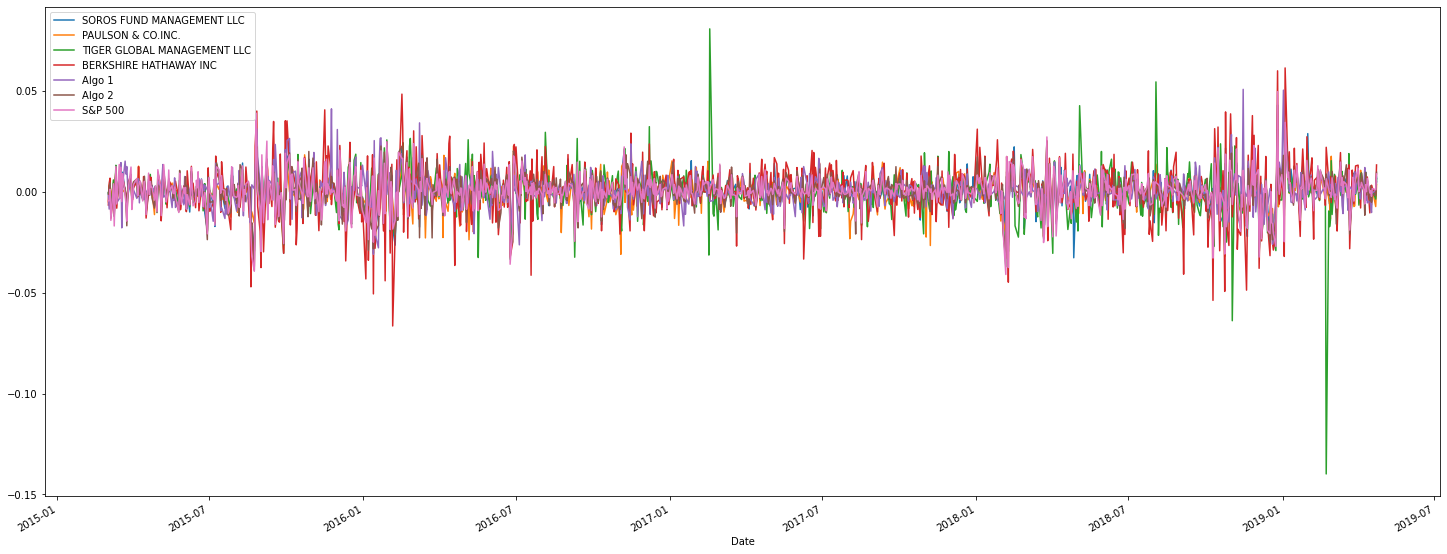

In [92]:
# Plot daily returns of all portfolios
comb_portfolio_return.plot(figsize=(25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

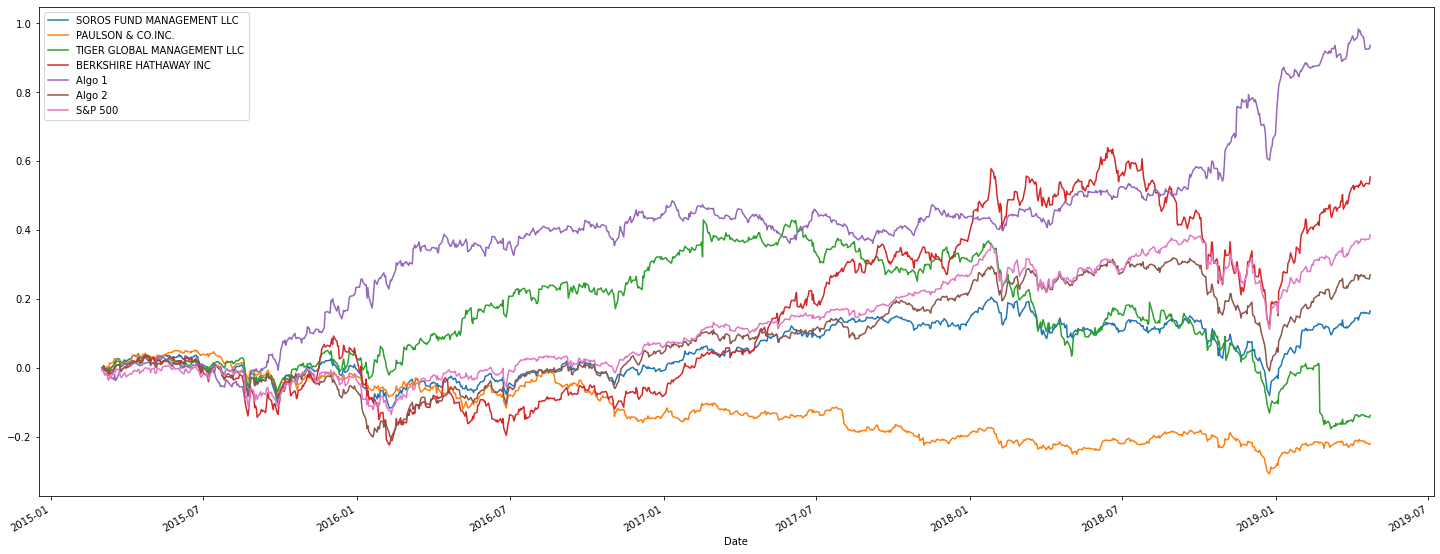

In [97]:
# Calculate cumulative returns of all portfolios
cum_returns = (1 + comb_portfolio_return).cumprod()-1
# Plot cumulative returns
cum_returns.plot(figsize=(25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

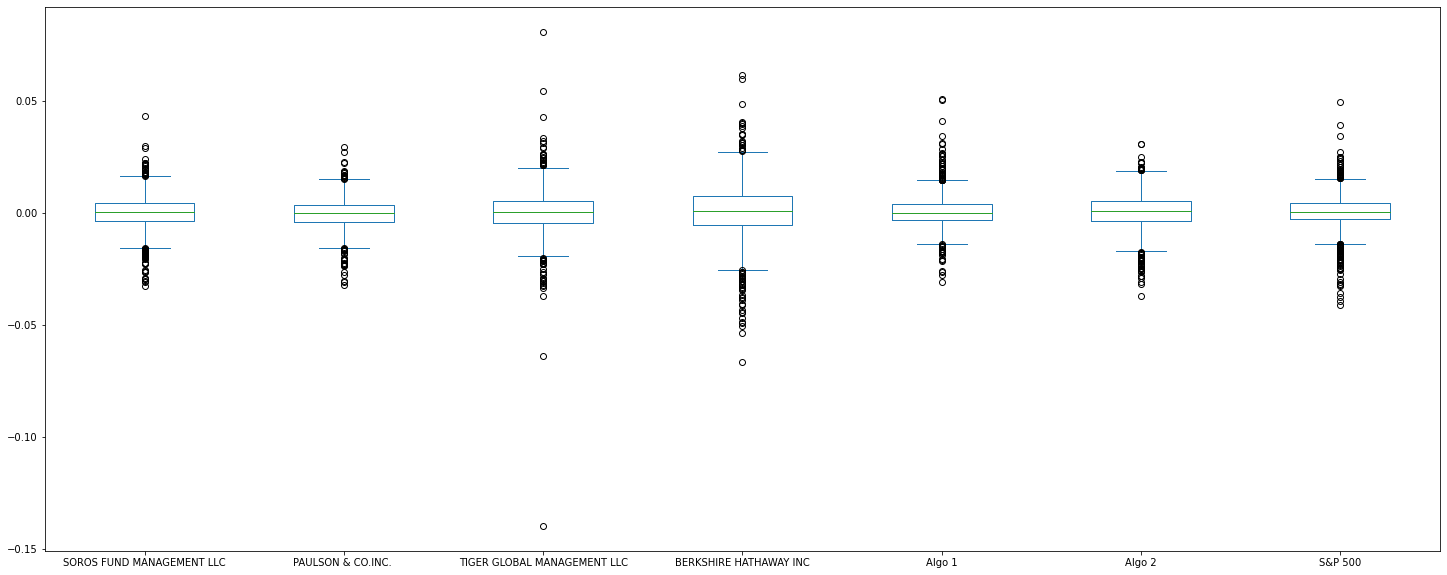

In [99]:
# Box plot to visually show risk
comb_portfolio_return.plot.box(figsize=(25,10))

### Calculate Standard Deviations

In [102]:
# Calculate the daily standard deviations of all portfolios
std_portfolios = comb_portfolio_return.std()
print(std_portfolios)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [110]:
# Calculate  the daily standard deviation of S&P 500
std_sp500 = sp500_returns.std()
print(std_sp500)
# Determine which portfolios are riskier than the S&P 500
greater_risk = std_portfolios[std_portfolios > std_portfolios["S&P 500"]]
print(greater_risk)

S&P 500    0.008111
dtype: float64
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [113]:
# Calculate the annualized standard deviation (252 trading days)
std_annual = std_portfolios * np.sqrt(252)
print(std_annual)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

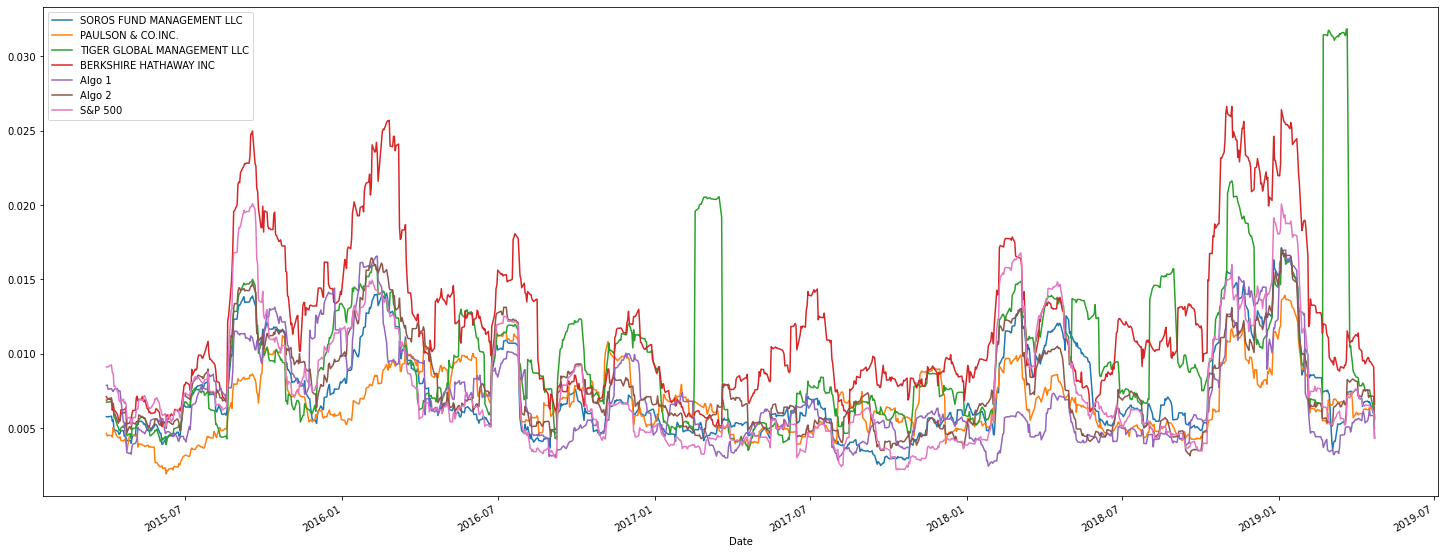

In [120]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_portfolios = comb_portfolio_return.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_portfolios.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

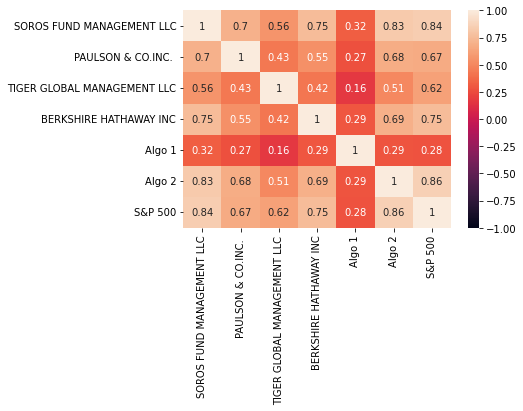

In [128]:
# Calculate the correlation
comb_portfolio_return.corr()
# Display de correlation matrix
sns.heatmap(comb_portfolio_return.corr(), vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60 Day Rolling Beta of my BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

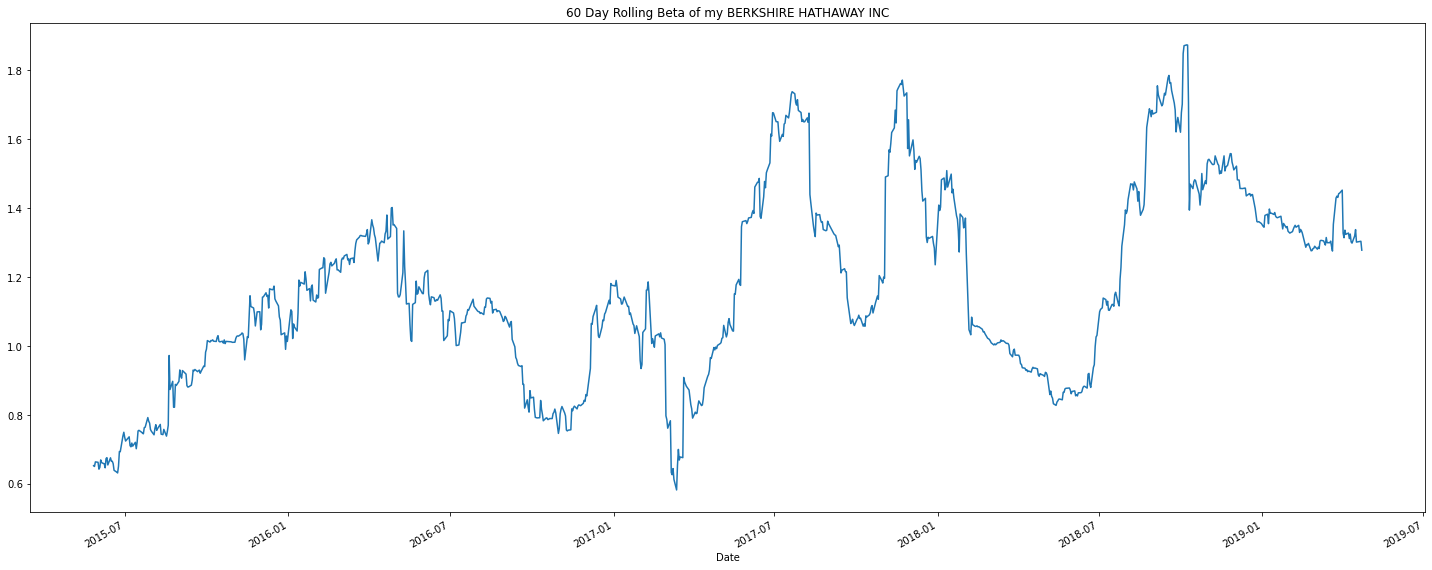

In [255]:
# Calculate and plot Beta
covariance = comb_portfolio_return['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(comb_portfolio_return['S&P 500'])
variance = comb_portfolio_return["S&P 500"].rolling(window=60).var()
rolling_beta= covariance/variance
# Plotting Beta
rolling_beta.plot(figsize=(25,10), title= ("60 Day Rolling Beta of my BERKSHIRE HATHAWAY INC"))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [149]:
# Use `ewm` to calculate the rolling window
half_life=comb_portfolio_return.ewm(halflife=21).std()
half_life.isnull().sum()
half_life.dropna(inplace=True)
half_life.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.008454


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [150]:
# Annualized Sharpe Ratios
sharpe_ratios = (comb_portfolio_return.mean() *252) / (comb_portfolio_return.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

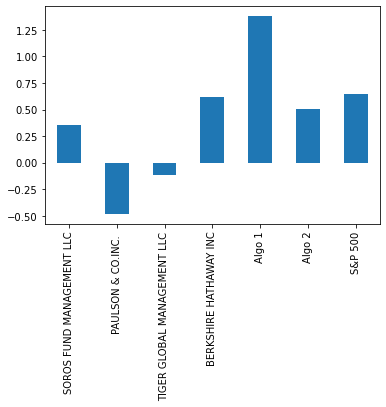

In [151]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
# Algo 1 outperformed and had less risk/volatility than all other portfolios. While Algo 2 underperformed compared to the S&P, Berkshire Hathaway, and Algo 1.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [202]:
# Reading data from 1st stock
google_stock_csv = Path("./goog_historical.csv")
google_stock_df = pd.read_csv(google_stock_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True,)
google_stock_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [203]:
# Reading data from 2nd stock
aapl_stock_csv = Path("./aapl_historical.csv")
aapl_stock_df = pd.read_csv(aapl_stock_csv, index_col='Trade DATE', infer_datetime_format=True,  parse_dates=True,)
aapl_stock_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [204]:
# Reading data from 3rd stock
cost_stock_csv = Path('./cost_historical.csv')
cost_stock_df = pd.read_csv(cost_stock_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True,)
cost_stock_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [207]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([google_stock_df, aapl_stock_df, cost_stock_df], axis='rows', join='inner')
#all_stocks.columns = ["Google","Apple","Costco"]
all_stocks.tail()

,Symbol,NOCP
Trade DATE,,
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48
2018-05-14,COST,195.88
2018-05-11,COST,195.76


In [208]:
# Reset Date index
all_stocks.reset_index(inplace=True)
all_stocks.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [210]:
# Reorganize portfolio data by having a column per symbol
my_stocks = all_stocks.pivot_table(values = 'NOCP', index = 'Trade DATE', columns = "Symbol")
my_stocks.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [211]:
# Calculate daily returns
all_stocks_returns = my_stocks.pct_change()
# Drop NAs
all_stocks_returns.dropna(inplace=True)
# Display sample data
all_stocks_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [190]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns=all_stocks_returns.dot(weights)
weighted_returns.sum()
# Display sample data
weighted_returns.columns = ["Custom"]
weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [198]:
# Join your returns DataFrame to the original returns DataFrame
total_portfolio = pd.concat([comb_portfolio_return, weighted_returns], axis = "columns", join= "inner")
total_portfolio.rename(columns={0:"Personal Portfolio"}, inplace=True)
total_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Personal Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [199]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio.dropna(inplace=True)
total_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Personal Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [219]:
# Calculate the annualized `std`
total_portfolio_std = total_portfolio.std() * np.sqrt(252)
print(total_portfolio_std)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Personal Portfolio             0.211496
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

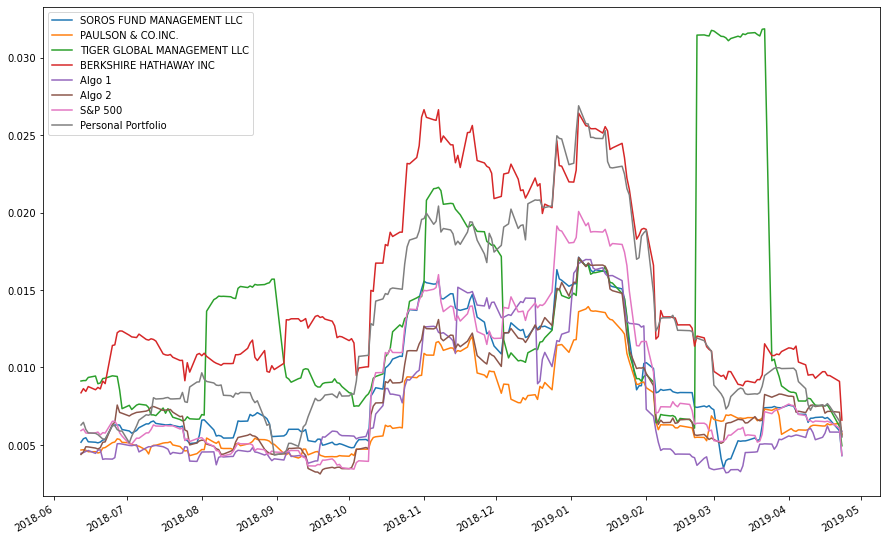

In [224]:
# Calculate rolling standard deviation
rolling_total_portfolio = total_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
rolling_total_portfolio.plot(figsize= (15,10))


### Calculate and plot the correlation

<AxesSubplot:>

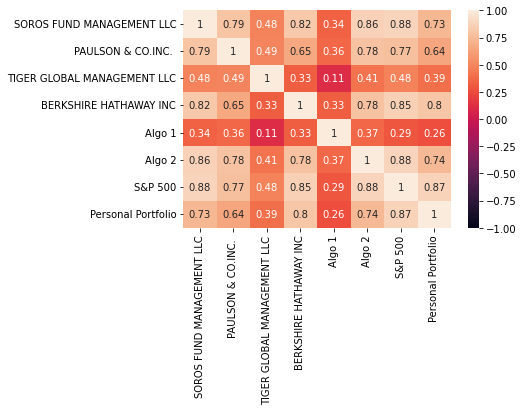

In [227]:
# Calculate and plot the correlation
total_portfolio.corr()
# Display de correlation matrix
sns.heatmap(total_portfolio.corr(), vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60 Day Rolling Beta of my Personal Portfolio'}>

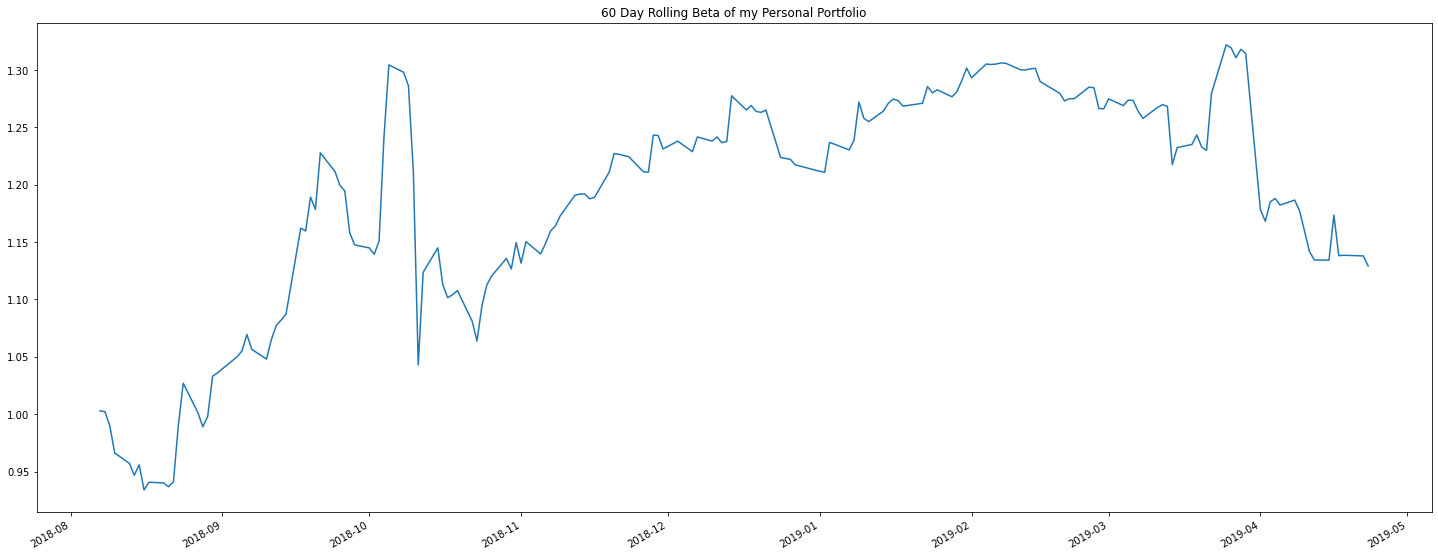

In [256]:
# Calculate and plot Beta
covar = total_portfolio['Personal Portfolio'].rolling(window=60).cov(total_portfolio['S&P 500'])
sp_variance = total_portfolio["S&P 500"].rolling(window=60).var()
rolling_beta= covar/sp_variance
# Plotting Beta
rolling_beta.plot(figsize=(25,10), title= ("60 Day Rolling Beta of my Personal Portfolio"))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [250]:
# Calculate Annualzied Sharpe Ratios
total_portfolio_sharpe=(total_portfolio.mean()*252)/(total_portfolio.std()*np.sqrt(252))
print(total_portfolio_sharpe)

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Personal Portfolio             0.933123
dtype: float64


<AxesSubplot:>

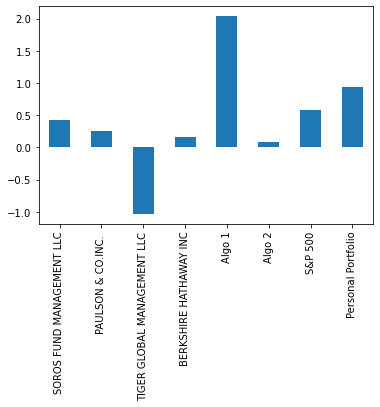

In [251]:
# Visualize the sharpe ratios as a bar plot
total_portfolio_sharpe.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
# Using the Sharpe ratio it can be seen that my Personal Portfolio came in second behind Algo 1 which had the highest risk calculated return.